In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

from mesh import  make_uniform_mesh
import barenblatt_solution_1

import heat_1D

from darcy_1D import solve

## Diffusion non-linéaire

In [13]:
L=5
t0 = 0
tf =.2
M = 3
N=300
dx = L/N
dt = tf/100
theta = 1
umesh = make_uniform_mesh(L, N)
x = umesh.centres

In [15]:
m =2;
Kfun = lambda u: u**(m-1)
sigma =1e-1
initfunc = lambda x:(M/np.sqrt(2*np.pi * (sigma**2))) * np.exp(-(x**2)/ (2 * (sigma**2)))
uinit = initfunc(x)
bcleft = {'type': 'Neumann', 'value': lambda t: 0.0}
bcright = {'type': 'Neumann', 'value': lambda t:0.0}
bcs = [bcleft, bcright]
    
def rhsfunc(x,t):
    return lambda x: np.zeros_like(x)
rhsf= lambda t: rhsfunc(x,t)
ts, u = heat_1D.time_loop(umesh, Kfun, bcs, rhsf, t0, tf, dt, theta, uinit, lineaire=False)

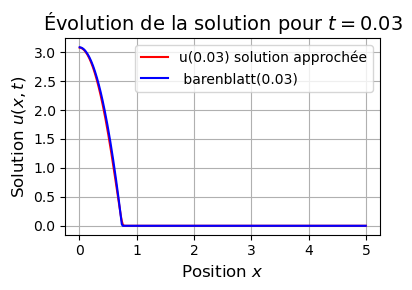

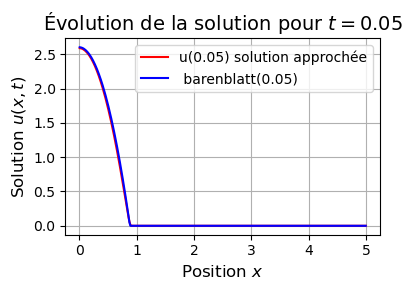

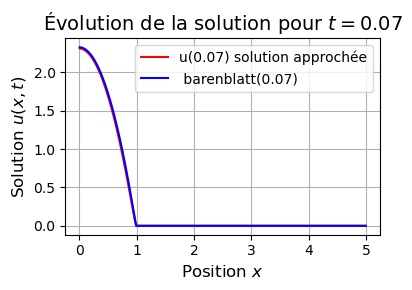

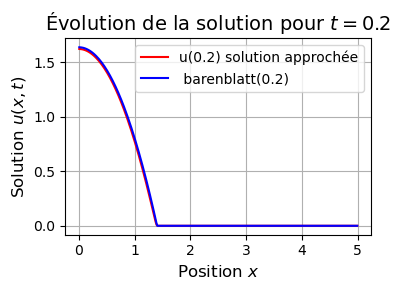

In [16]:
for t in [0.03 , 0.05 , 0.07 ,0.2]:
    plt.figure(figsize=(4,3))
    t_index = int(t / dt)
    plt.plot(x, u[t_index], 'r' , label=f'u({t}) solution approchée')  # Utiliser t_index au lieu de t
    # Tracer les solutions analytiques pour solex
    plt.plot(x, barenblatt_solution_1.barenblatt(x, t, M, m, n=1,num_points=10000), 'b' ,  label=f' barenblatt({t})')
    
    
    plt.xlabel('Position $x$', fontsize=12)
    plt.ylabel('Solution $u(x, t)$', fontsize=12)
    plt.title(f'Évolution de la solution pour $t = {t}$', fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(True)
    plt.tight_layout()
    plt.show()